In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Read CSV
df = pd.read_csv("tcs.csv")

# Convert Date column and sort
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df.sort_values('Date', inplace=True)

# Create target: 1 if price went up, else 0
df['Target'] = (df['Tata Close'].shift(-1) > df['Tata Close']).astype(int)

# Drop last row (no label)
df = df.dropna()

# Features and target
X = df[['Tata Open', 'Tata High', 'Tata Low', 'Tata Close', 'Tata Volume']]
y = df['Target']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Linear kernel for basic separation; use 'rbf' for non-linear
model = SVC(kernel='rbf')  # Try kernel='linear' or 'poly' as alternatives
model.fit(X_train_scaled, y_train)


SVC()

In [17]:
y_pred = model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5161290322580645
Confusion Matrix:
 [[ 33 103]
 [ 17  95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.24      0.35       136
           1       0.48      0.85      0.61       112

    accuracy                           0.52       248
   macro avg       0.57      0.55      0.48       248
weighted avg       0.58      0.52      0.47       248



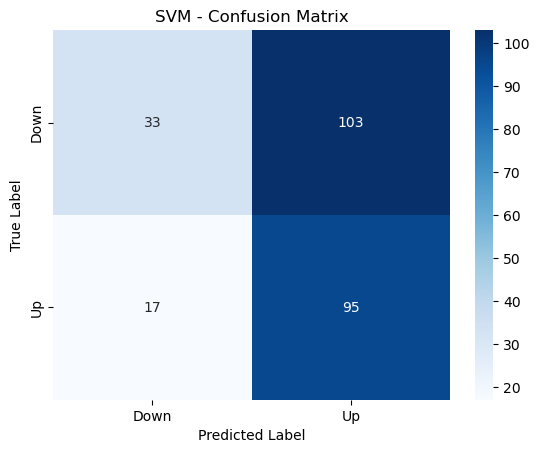

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM - Confusion Matrix")
plt.show()


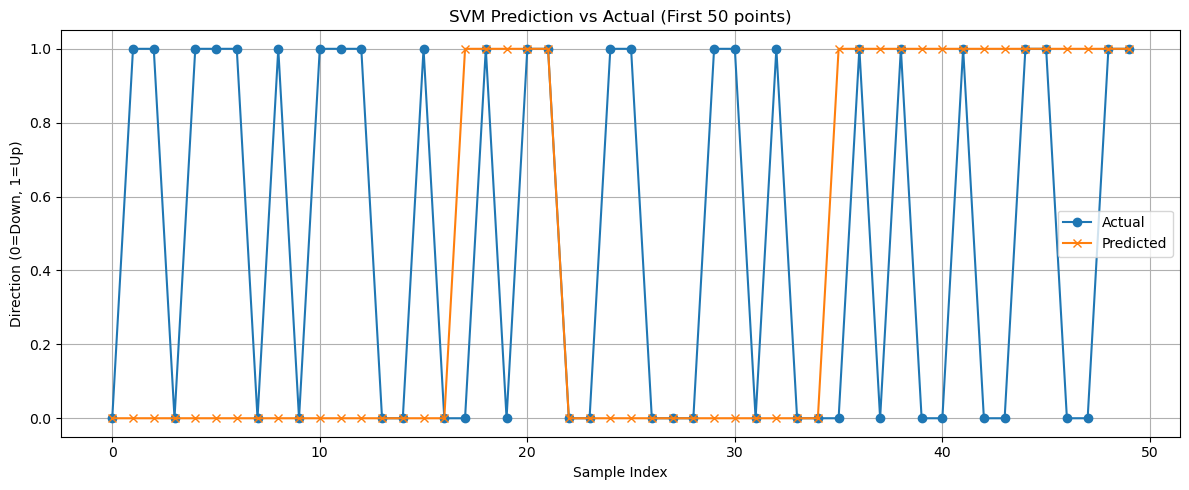

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.title("SVM Prediction vs Actual (First 50 points)")
plt.xlabel("Sample Index")
plt.ylabel("Direction (0=Down, 1=Up)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


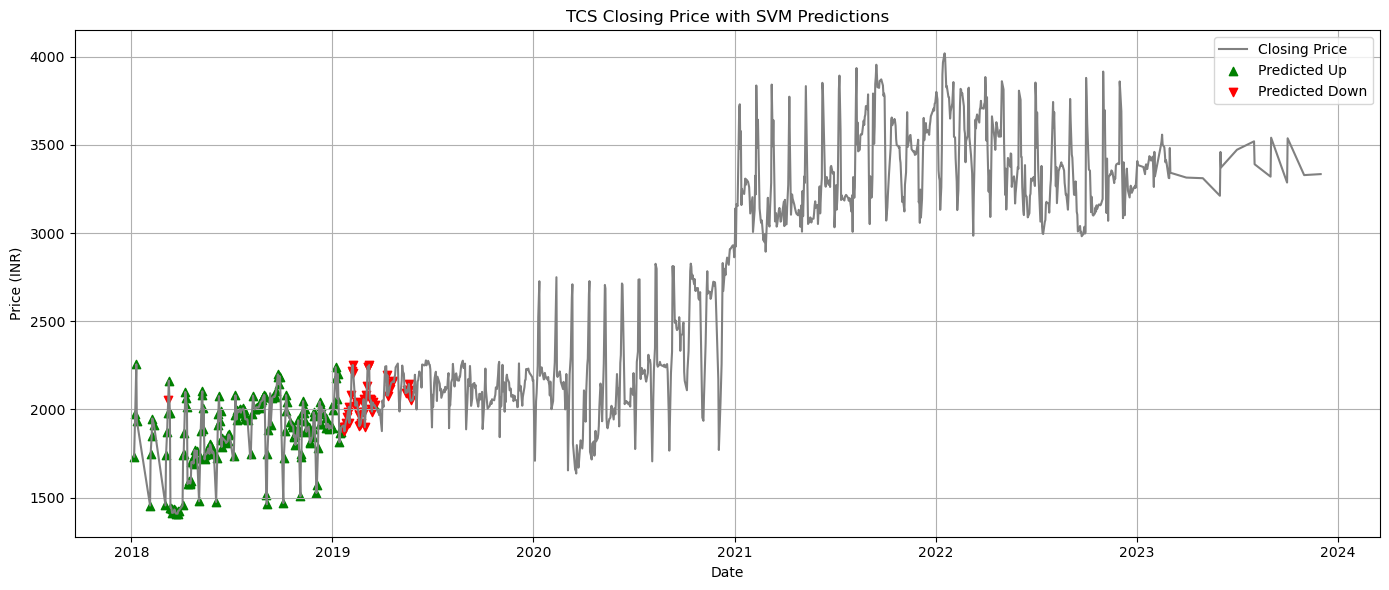

In [23]:
# Get prediction dates
pred_dates = df.iloc[y_test.index]['Date']

# Plot close price
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Tata Close'], label='Closing Price', color='gray')

# Mark predicted ups and downs
up_dates = pred_dates[y_pred == 1]
down_dates = pred_dates[y_pred == 0]
plt.scatter(up_dates, df.loc[up_dates.index, 'Tata Close'], color='green', label='Predicted Up', marker='^')
plt.scatter(down_dates, df.loc[down_dates.index, 'Tata Close'], color='red', label='Predicted Down', marker='v')

plt.title('TCS Closing Price with SVM Predictions')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

